In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/economic_index.csv')
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
## Drop unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head(5)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

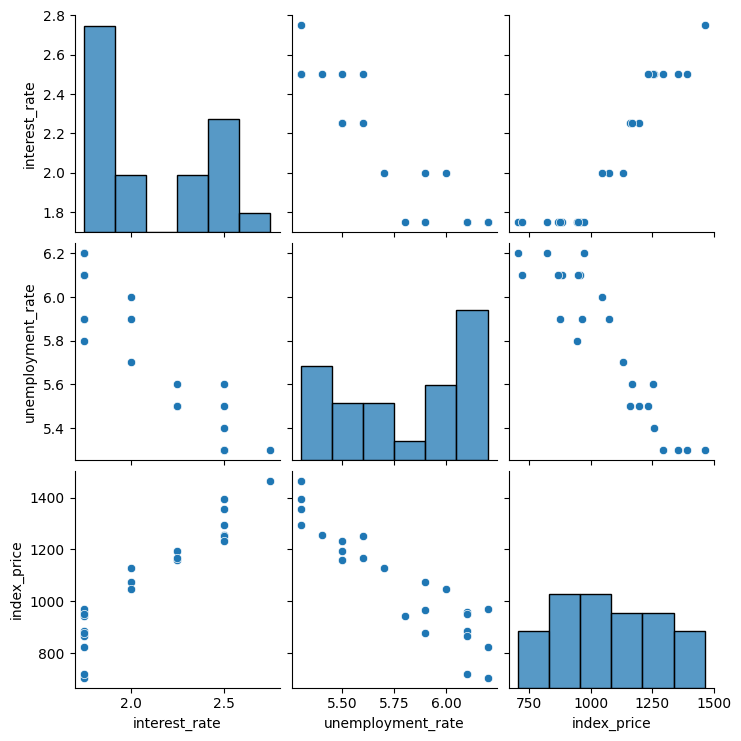

In [6]:
## Let's do some visualization
sns.pairplot(df)

**Observation**:
- If we can see that the interest_price and the index_price is linearly related
- Unemployemnt_rate is inversely related to index_price
- Unemployement_rate and interest_price is also inversely related

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

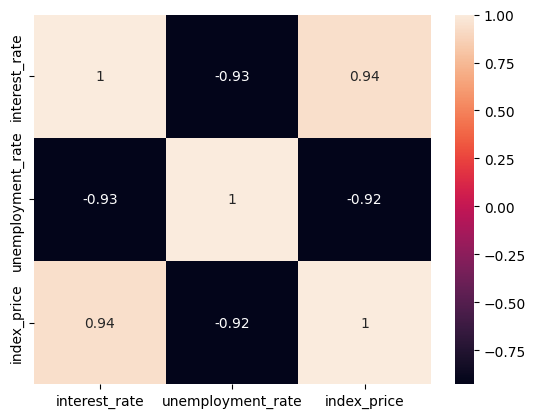

In [8]:
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Unemployement rate')

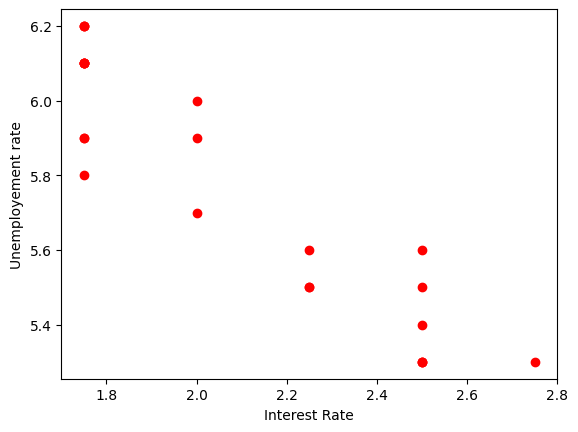

In [13]:
## Visualize Datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployement rate")

In [14]:
## Independent and Dependent features
# X = df[['interst_rate','unemployment_rate']]
X = df.iloc[:,:-1]
# y = df['index_price']
y = df.iloc[:,-1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

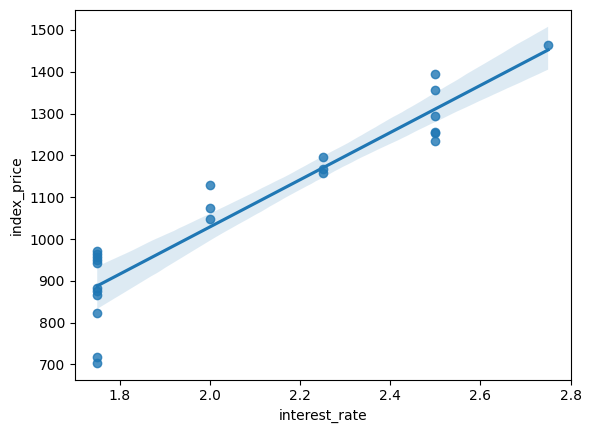

In [20]:
sns.regplot(data=df,x='interest_rate',y='index_price')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

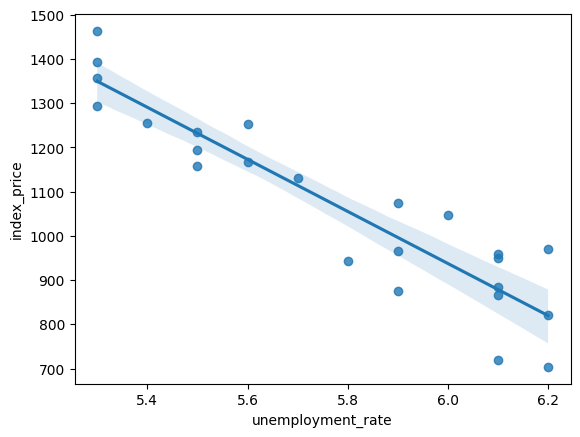

In [22]:
sns.regplot(data=df,x='unemployment_rate',y='index_price')

<Axes: xlabel='interest_rate', ylabel='Count'>

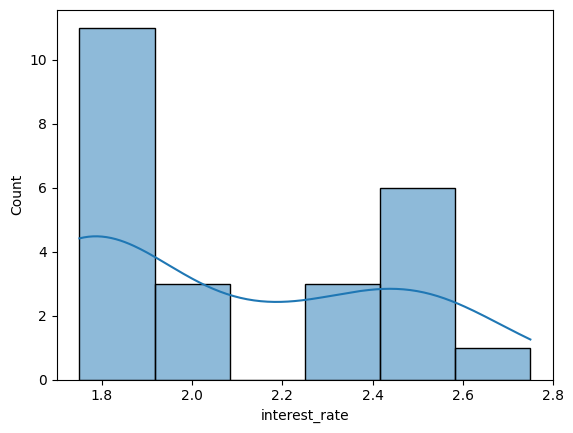

In [23]:
sns.histplot(data=df,x='interest_rate',kde=True)

<Axes: xlabel='unemployment_rate', ylabel='Count'>

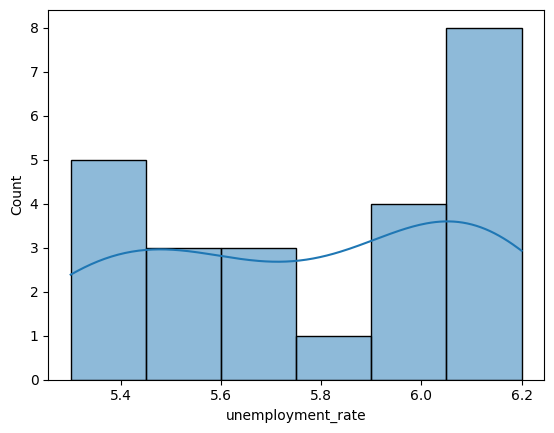

In [24]:
sns.histplot(data=df,x='unemployment_rate',kde=True)

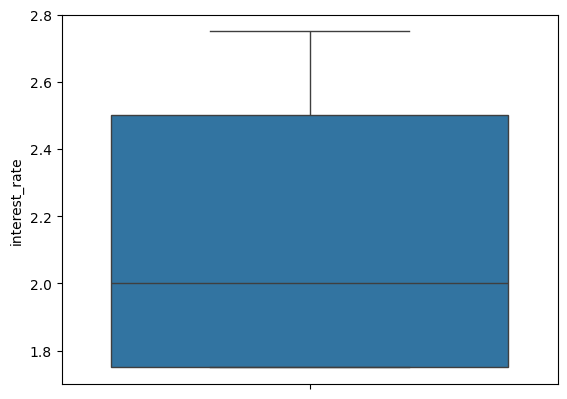

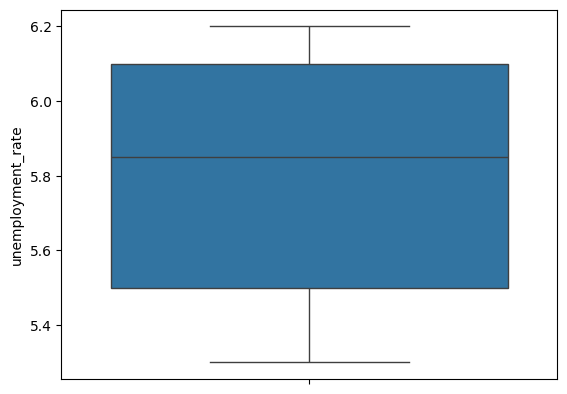

In [25]:
columns = ['interest_rate','unemployment_rate']
for column in columns:
    plt.subplots()
    sns.boxplot(df[column])

**Observation:**
- Here the 2 features data is not normally distributed and nearly the kde function is nearlu showing it as uniform distribution
- And the 2 features have no outliers...
*So it is better to use Normalization*

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[0.        , 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.77777778],
       [0.        , 0.88888889],
       [1.        , 0.        ],
       [1.        , 0.11111111],
       [0.        , 1.        ],
       [0.        , 0.88888889],
       [0.        , 0.66666667],
       [0.        , 0.88888889],
       [0.66666667, 0.22222222],
       [0.33333333, 0.44444444],
       [0.        , 0.55555556],
       [0.        , 0.88888889],
       [1.        , 0.22222222]])

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                   cv=3)

In [35]:
numpy.mean(validation_score)

np.float64(-5914.82818016239)

In [36]:
## prediction
y_pred = regression.predict(X_test)

In [39]:
## Performace Metrix
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = numpy.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712574
59.93578152323554
76.11677139574809


In [40]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.8278978091457143


In [41]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428572

## Assumptions

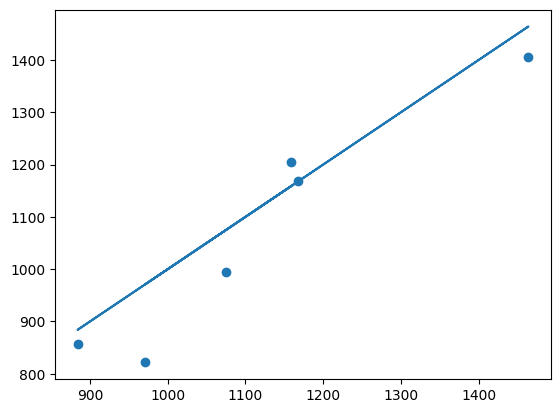

In [43]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

In [44]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


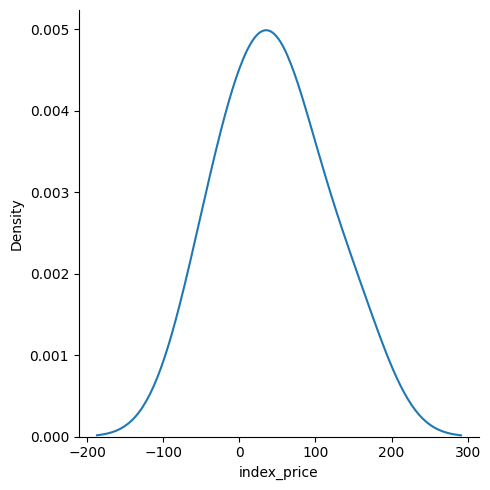

In [47]:
## Plot this residuals
sns.displot(residuals,kind='kde')

**Here we are getting normal distribution means our model predictions are pretty good**

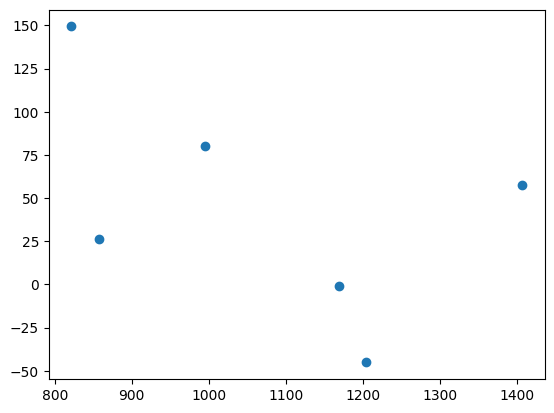

In [48]:
## Scatter plot with respect to predictions and residuals
plt.scatter(y_pred,residuals)

**Here it follows uniform distribution means it is pretty good**\
**It is forms any patterns then there is problem in our model**

In [49]:
import statsmodels.api as sm

In [50]:
model = sm.OLS(y_train,X_train).fit()

In [51]:
prediction = model.predict(X_test)
print(prediction)

[1030.04955305  990.16219712 1620.02701848  880.14417522 1065.11488603
 1140.06757495]


In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              212.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                    3.01e-12
Time:                        16:43:27   Log-Likelihood:                         -121.33
No. Observations:                  18   AIC:                                      246.7
Df Residuals:                      16   BIC:                                      248.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [53]:
print(regression.coef_)
print(regression.intercept_)

[ 195.25281839 -324.52539346]
1146.1759124902335
